# Anscombe's Quartet Dataset - An Investigation

![anscombe.jpg](anscombe.jpg)
*image from https://en.wikipedia.org/wiki/Frank_Anscombe*
## Background
Francis Anscombe submitted [a paper](http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf) to *The American Stastician* in February 1973 titled **Graphs in Statistical Analysis** in which he presented four fictitious datasets, each of eleven (x,y) pairs. The x-values in the first 3 datasets are all the same and listed once only.  

![dataset.jpg](dataset.jpg)
*image from http://brianmc.dbsdataprojects.com/2016/02/29/analysis-of-anscombes-quartet/*


Looking at the above image gives the impression of four different sets of very similar data, with a few exceptions (for example, the third row of the third dataset, where there is a spike in the sequence of numbers).  Anscombe's data, according to [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) "are identical when examined using simple summary statistics, but vary considerably when graphed". [Summary statistics](https://en.wikipedia.org/wiki/Summary_statistics) is the information that gives the largest amount of information as simply as possible, for example, mean, min, max, range and standard deviation.   

The purpose of Anscombe's datasets was to demonstrate the importance of visualising data before analysing it and also, the effects of [outliers](https://en.wikipedia.org/wiki/Outlier) on statistics. Anscombe posited that "a computer should make *both* calculations and graphs. Both sorts of output should be studied; each will contribute to understanding".  When Anscombe's data is plotted, it shows that although his four datasets apear to be very similiar, when they are graphed using a model to demonstrate linear relationship, they are proven to actually be quite different, as the below image shows:
![1280px-Anscombe's_quartet_3.svg.png](1280px-Anscombe's_quartet_3.svg.png)
*image from https://en.wikipedia.org/wiki/Anscombe%27s_quartet*

It is clear from the above image that when graphed using scatterplots with simple linear regression models the data are not similiar and graphing them in this manner may not be the best choice. Dataset I follows a linear relationship with a small amount of noise. Dataset II appears as a curve and a linear model does not express the values appropriately.  Dataset III seems to offer a good linear relationship save for one outlier which throws the fit of the model out.  Dataset IV again does not follow a linear relationship and instead shows a constant value for x except for an outlier appearing at the intercept of the 12th point on the y axis and 19th point on the x axis.

## Plotting Anscombe's data set
From reading about Anscombe and the data set online I discovered that it is [available ready-loaded in Seaborn](https://www.tutorialspoint.com/seaborn/seaborn_quick_guide.htm) so I went about finding out how to load it to begin, determining some summary statistics and then trying out some plots. I referred to the [seaborn documentation](https://seaborn.pydata.org/) for commands and syntax and chose to reproduce the linear plots as per the above image.

In [1]:
#to import pandas for summary statistics and seaborn for plotting
import pandas as pd #to import pandas
import seaborn as sns #to import seaborn
#datasets that are ready-loaded in seaborn
print (sns.get_dataset_names())

C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'mpg', 'planets', 'tips', 'titanic']


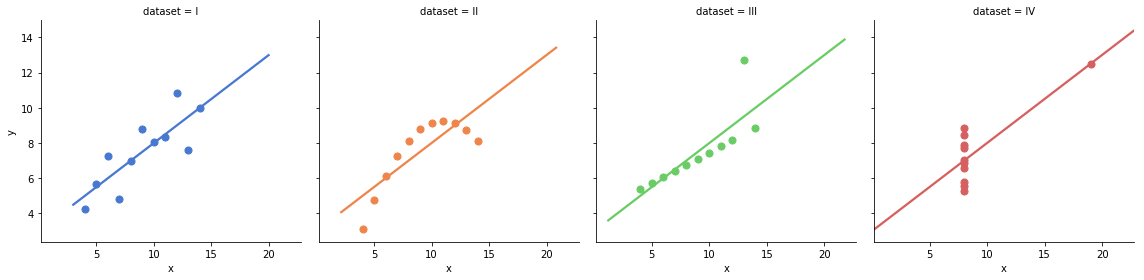

In [2]:
# https://seaborn.pydata.org/examples/anscombes_quartet.html
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
         ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

I wanted to investigate the dataset visually by trying out various other forms of plots, which would also help me to get familiar with what is available to generate in Seaborn.  I decided on a barplot first, tweaking a code snippet from the Seaborn documentation, charting all sets together:

C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


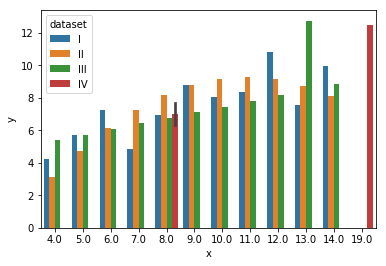

In [3]:
sns.barplot(x='x', y='y', hue='dataset', data=df)

Next I decided to try a [lineplot](https://stackoverflow.com/questions/31069191/simple-line-plots-using-seaborn) and noticed that it was reminiscent of the linear regression model - the high peak of the outlier in Dataset III was visible as was the curve of Dataset II.

C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


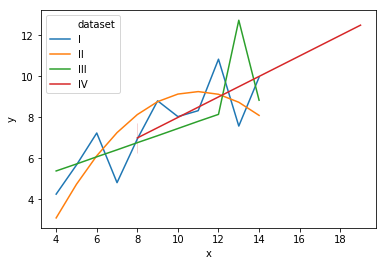

In [4]:
sns.lineplot(x='x', y='y', hue='dataset', data=df)

A swarmplot of all the data points combined shows the commonality of the majority of the numbers and also shows the constant value of x in dataset IV. 

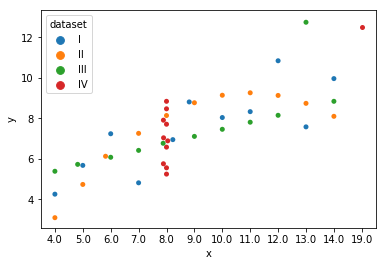

In [5]:
sns.swarmplot(x ='x', y='y', hue='dataset', data =df)

A seaborn relplot expresses the datasets in a more condensed way, in a ["trellis"](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) fashion. 

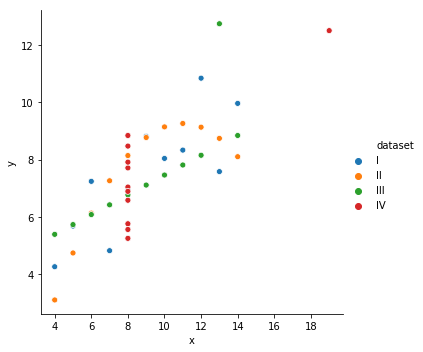

In [6]:
sns.relplot(x ='x', y='y', hue='dataset', data =df)

## Line of Best Fit
A regplot from Seaborn will display the "line of best fit" for this data.  This means that a scatterplot will be graphed by the package with all data points from the dataset represented, but with the addition of a straight line (or "trend line") depicting [the sum of the squares of the residual errors between the individual data values and the line is at its minimum](https://study.com/academy/lesson/line-of-fit-line-of-best-fit-definitions-equations.html).  

C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


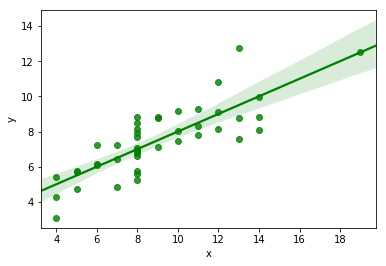

In [32]:
sns.regplot(x=x, y=y, color="g")#https://seaborn.pydata.org/generated/seaborn.regplot.html

## Outliers
Anscombe recommends in his 1973 paper that where there are outliers "it is usually wise first to check that the values used really are correct, that is, not copied wrongly nor obviously faulty in some way.  Then, if we are satisfied that these readings are authentic, we may perhaps set them aside for special study, and fit a regression relation to the remainder of the data".  For the sake of experiment, I decided to remove the outlier from Dataset III and re-plot it.

In [60]:
df = sns.load_dataset("anscombe")
p = df.iloc[22:33]#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
print (p)

   dataset     x      y
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73


When looking at the above dataframe rows 24 and 27 appear to stand out most, so I decided to remove these and then plot the results - 

In [80]:
p.drop([24, 27])#https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
25,III,9.0,7.11
26,III,11.0,7.81
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42
32,III,5.0,5.73


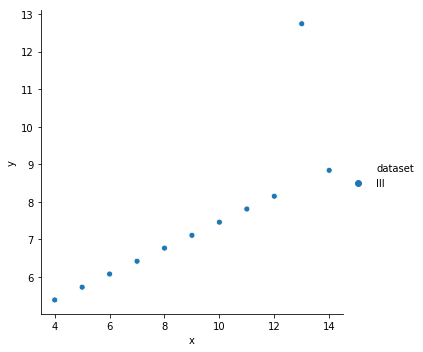

In [82]:
sns.relplot(x ='x', y='y', hue='dataset', data=p)

However, the above plot still shows an outlier.  Anscombe's opinion on removing outliers is expanded in his paper when he details graphing data on expenditures in public schools per state in the US and the effect that the data for Alaska has on the regression relation. He makes the point that Alaska is an abnormal state and can be removed, but there are other extraordinary states too and he poses the question at what point does one stop removing outliers? For example, I could theoretically remove row 30 from the above dataframe and replot, but it's likely that row 26 will skew the results then and so on. 

## Summary Statistics
In order to calculate the summary statistics of the dataset I borrowed an example from a website named ["Un peu de math"](https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html) which helps to highlight how alike the data are, with very little variation across all of these categories:

In [85]:
#https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html
df = sns.load_dataset("anscombe")
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

As the above summary shows, the mean and the standard deviation of x and y are  almost identical across all four datasets.

Further reading on the dataset led me to understand that the correlation coefficients (that is, the dependence of the x and y variables on each other) and the linear regression across the data are also identical, and I wanted to figure out how to display that.

In [8]:
df.corr()#https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


## Summary

Anscombe's dataset is a perfect example of how data should be visualised in order to assist with truly grasping them.  Judging by the above descriptive summary it would be far too easy to make the assumption that these four datasets are almost identical and would therefore yield identical plots.  It also demonstrates the impact of "outliers" on data and how a seemingly small and nondescript difference can skew results. 

### References
1. Image 1
2. [Graphs in Statistical Analyis paper](http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf)
3. Image 2
4. [Wikipedia article on Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
5. [Wikipedia article on summary statistics](https://en.wikipedia.org/wiki/Summary_statistics)
6. [Wikipedia article on outliers](https://en.wikipedia.org/wiki/Outlier)
7. Image 3
8. [Seaborn tutorial, tutorialspoint.com](https://www.tutorialspoint.com/seaborn/seaborn_quick_guide.htm)
9. [Seaborn documentation](https://seaborn.pydata.org/)
10. [Line of best fit definition, study.com](https://study.com/academy/lesson/line-of-fit-line-of-best-fit-definitions-equations.html)
11.[Using iloc, loc, & ix to select rows and columns in pandas DataFrames, shanelynn.ie](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)
12.[Dropping rows and columns in pandas Dataframes, chrisalbon.com](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/)
13.[Anscombe's quartet, variability and studying queues with Python, vknight.org "Un Peu du Math"](https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html)
14.[Correlation coefficient of two columns in pandas dataframe with .corr(), stackoverflow.com](https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr)


### End